In [1]:
# https://yt-project.org/
# Import the shiiiii

import yt
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from FLASH_functions import *
sys.path.append('../analysis_scripts')
from real_units_to_sim import get_osiris_units

# Assuming the correct numerical values are input into the file real_units_to sim, this should spit out the correct simulation values 
osiris = get_osiris_units()

ModuleNotFoundError: No module named 'FLASH_functions'

## First, let's just take a look at some slices of the data

In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "~/cellar/OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

ds = yt.load(plot_path)
list(ds.fields.flash)

yt : [INFO     ] 2024-10-18 09:41:31,901 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-10-18 09:41:31,967 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-10-18 09:41:31,967 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-10-18 09:41:31,967 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-10-18 09:41:31,967 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-10-18 09:41:31,968 Parameters: cosmological_simulation   = 0


[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [3]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[288 272 288]
2


yt : [INFO     ] 2024-10-18 09:42:06,396 xlim = -0.600000 0.600000


yt : [INFO     ] 2024-10-18 09:42:06,397 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:42:06,398 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:42:06,398 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:42:06,398 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800


dens at [0.   0.05 0.  ] code_length: [0.00154312] code_mass/code_length**3



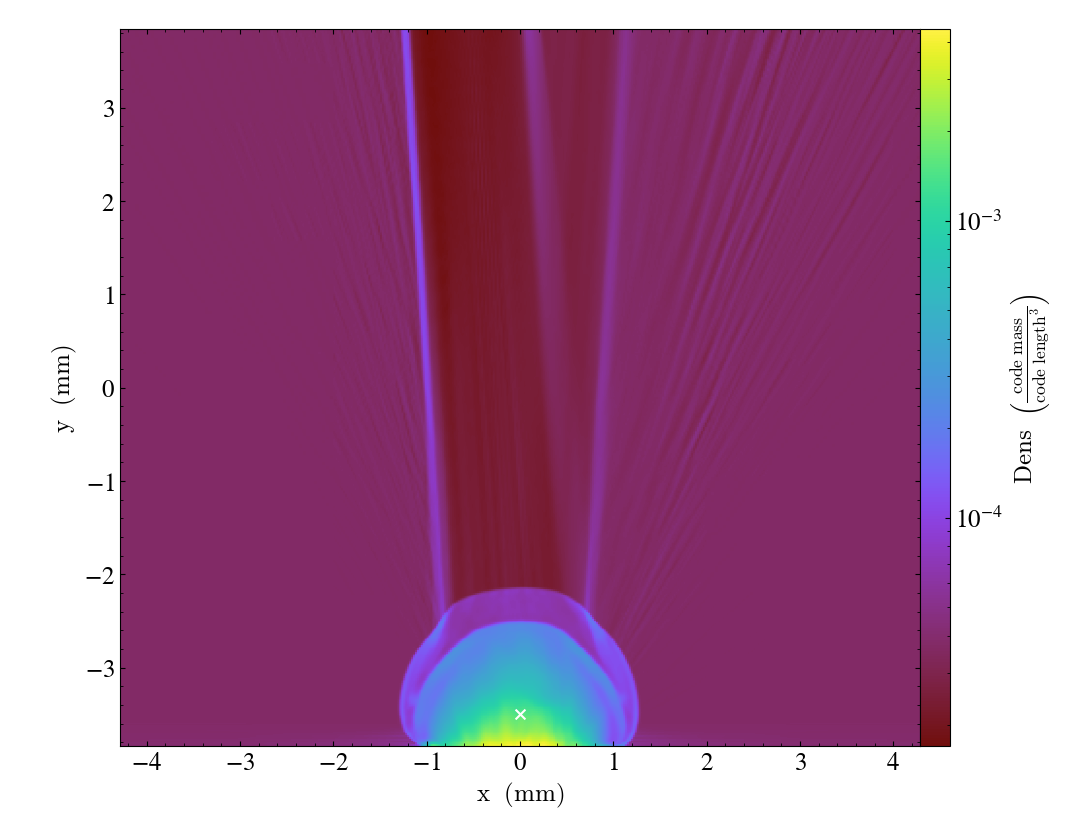

In [8]:
# Find some points in the channel to pull values from

# background_pt = [-0.4, 0.3, 0.0]
background_pt = [0, 0.05, 0.0]

rho_0 = pull_value_at_coord(background_pt,'dens',ds)

# looks good

In [5]:
# perform appropriate conversions to get the number density of ions and electrons

def make_ion_number_density(field, data):
    avogadro = 6.022e23
    ion_number_density = avogadro*data["flash","dens"]*data["flash","sumy"]
    return ion_number_density

def make_electron_number_density(field, data):
    avogadro = 6.022e23
    electron_number_density = avogadro*data["flash","dens"]*data["flash","ye"]
    return electron_number_density

def make_ele_per_ion(field, data):
    return data['flash','edens']/data['flash','idens']

ds.add_field(("flash", "idens"), function=make_ion_number_density, units="code_mass/code_length**3",sampling_type="cell") # technically the units are wrong here, should be massless
ds.add_field(("flash", "edens"), function=make_electron_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here
ds.add_field(("flash", "ele_per_ion"), function=make_ele_per_ion,units="", sampling_type="cell")

yt : [INFO     ] 2024-09-24 16:19:02,843 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-24 16:19:02,843 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-09-24 16:19:02,844 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-24 16:19:02,844 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-09-24 16:19:02,845 Making a fixed resolution buffer of (('flash', 'vely')) 800 by 800



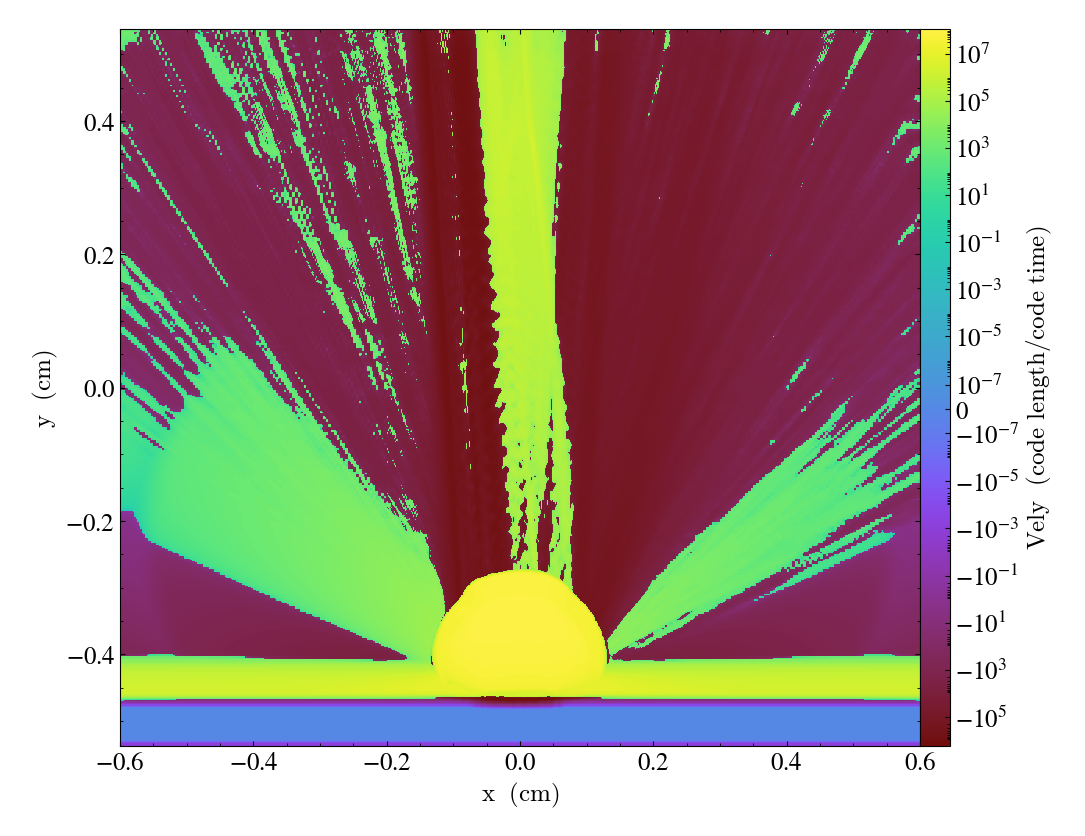

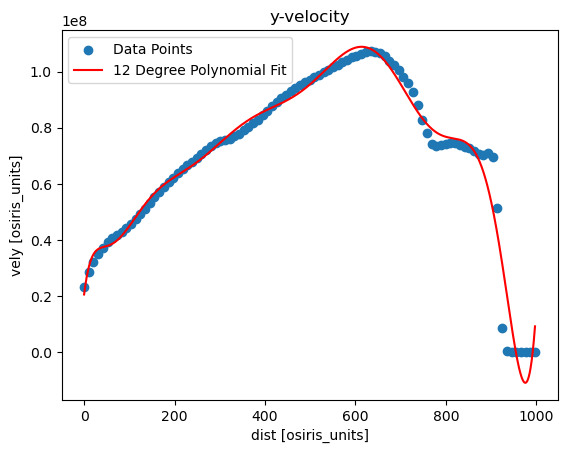

"if(x1 < 996.863641,  (-12835949866254.012)*((x1 - 0.0)/996.863641)^(12) + (81515075221697.45)*((x1 - 0.0)/996.863641)^(11) + (-224974754516268.1)*((x1 - 0.0)/996.863641)^(10) + (354829392321057.8)*((x1 - 0.0)/996.863641)^(9) + (-353692276277623.)*((x1 - 0.0)/996.863641)^(8) + (232658132229018.03)*((x1 - 0.0)/996.863641)^(7) + (-102373887654746.22)*((x1 - 0.0)/996.863641)^(6) + (29894725031393.523)*((x1 - 0.0)/996.863641)^(5) + (-5624531478730.643)*((x1 - 0.0)/996.863641)^(4) + (642986286051.8077)*((x1 - 0.0)/996.863641)^(3) + (-40215716116.52395)*((x1 - 0.0)/996.863641)^(2) + (1293051641.958407)*((x1 - 0.0)/996.863641)^(1) + (20484200.905707)*((x1 - 0.0)/996.863641)^(0), 0.0)",

----------Desmos formatting to check your work----------

(-12835949866254.012)*((x - 0.0)/996.863641)^12 + (81515075221697.45)*((x - 0.0)/996.863641)^11 + (-224974754516268.1)*((x - 0.0)/996.863641)^10 + (354829392321057.8)*((x - 0.0)/996.863641)^9 + (-353692276277623.)*((x - 0.0)/996.863641)^8 + (23265813222

In [6]:
slc = yt.SlicePlot(ds, "z", ("flash", 'vely'))
slc.show()

from fitting_functions import fit_to_region
plt.title('y-velocity')
fit_to_region(start_pt=[0.0,0.01,0.0],end_pt=[0.0,0.2,0.0],field='vely',degree=12,ds=ds, normalization=1, osiris=osiris,precision=6,left_value=None, right_value=0.0)

yt : [INFO     ] 2024-10-18 09:45:04,134 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:04,134 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:04,135 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:04,136 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:04,136 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800


edens at [0.   0.05 0.  ] code_length: [4.58796495e+20] code_mass/code_length**3



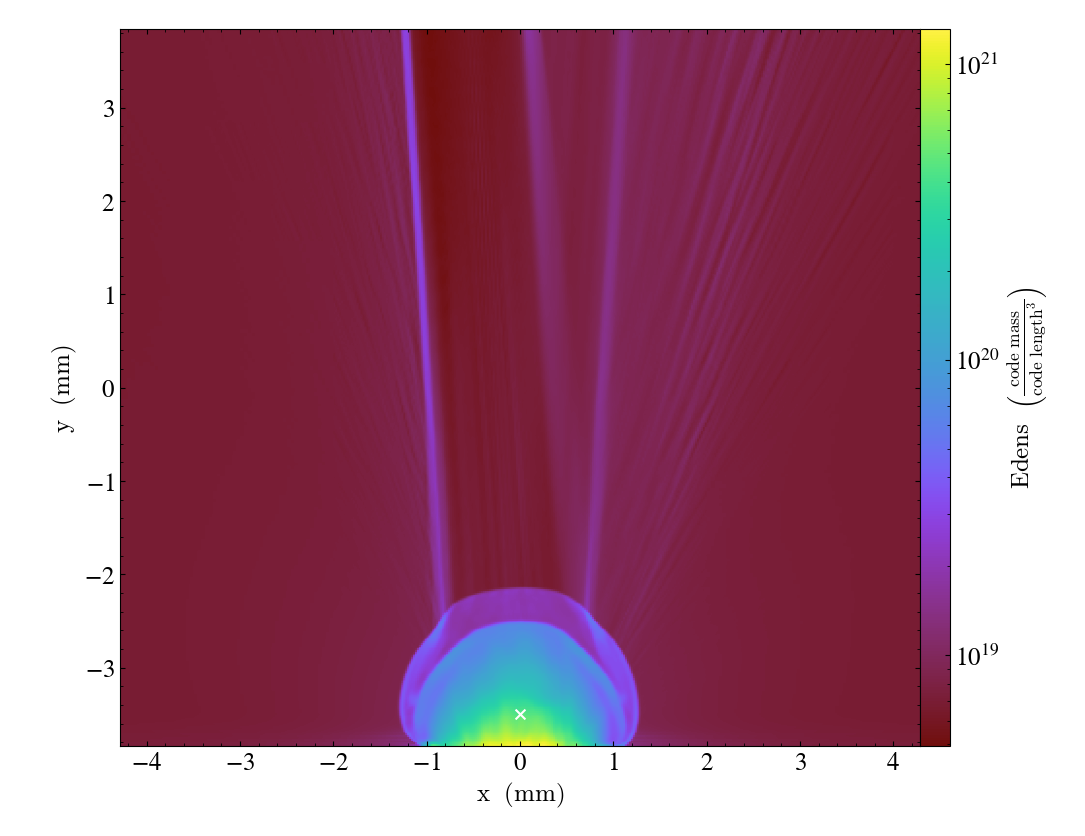

yt : [INFO     ] 2024-10-18 09:45:06,479 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:06,480 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:06,481 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:06,481 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:06,482 Making a fixed resolution buffer of (('flash', 'idens')) 800 by 800


idens at [0.   0.05 0.  ] code_length: [3.82334518e+19] code_mass/code_length**3



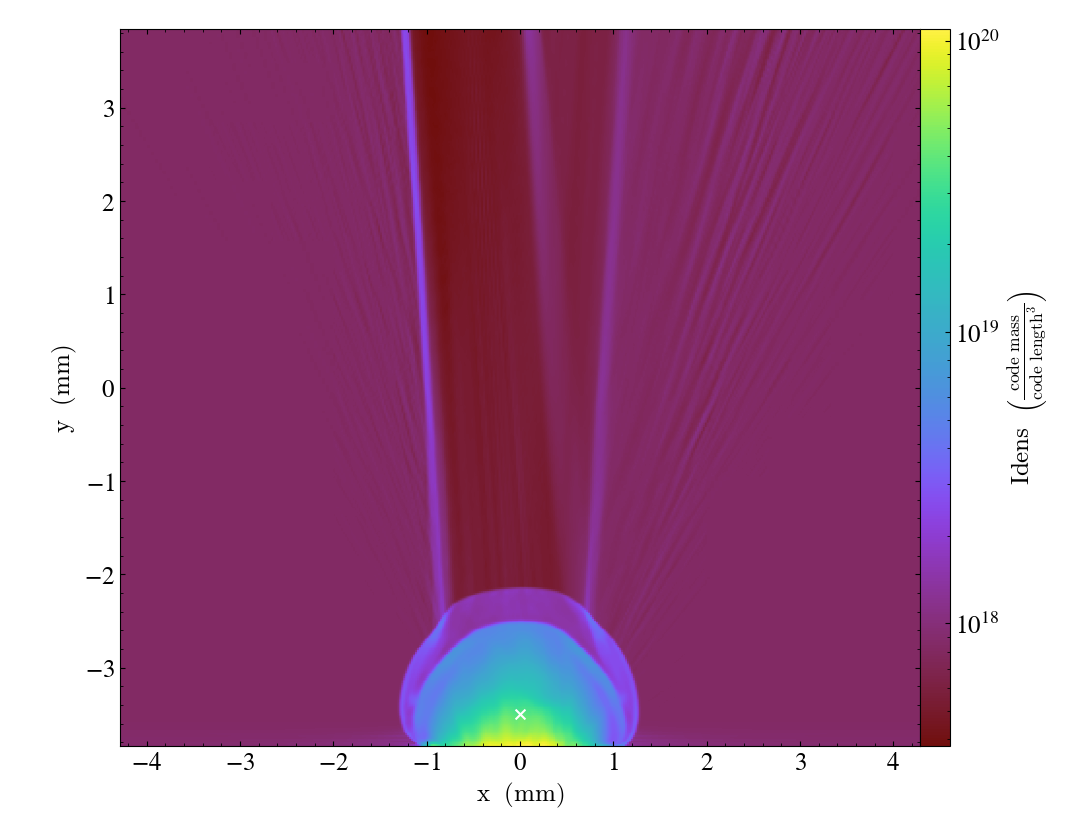

In [9]:
# background_pt = [-0.3, 0.12, 0.0]

ne_0 = pull_value_at_coord(background_pt,'edens',ds)
ni_0 = pull_value_at_coord(background_pt,'idens',ds)

Get alfven speed from the value of background B field in simulation

### $v_a = \frac{B}{\sqrt{4 \pi \rho}}$

yt : [INFO     ] 2024-09-24 16:19:10,941 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-24 16:19:10,942 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-09-24 16:19:10,943 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-24 16:19:10,943 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-09-24 16:19:10,944 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800


magx at [0.  0.4 0. ] code_length: [110226.77212444] code_magnetic



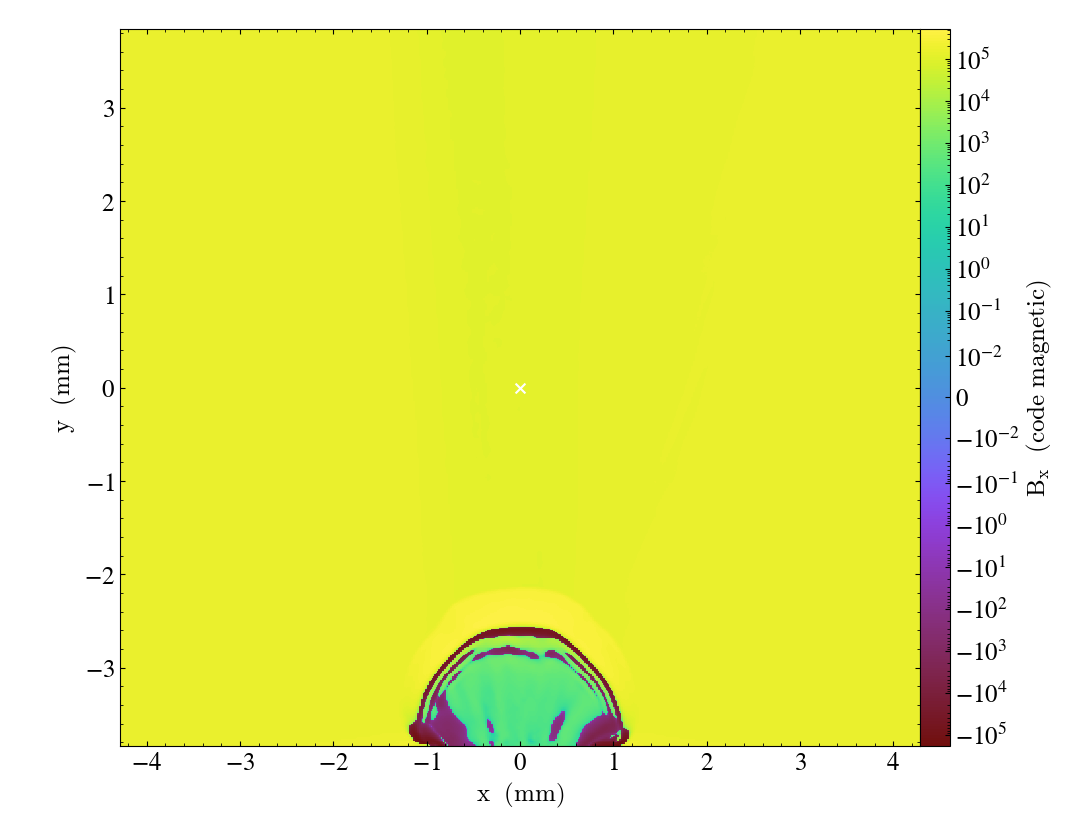

[6243815.75668848] code_length**(3/2)*code_magnetic/sqrt(code_mass)


In [8]:
Bx_0 = pull_value_at_coord(background_pt,'magx',ds)

v_alfven = Bx_0/np.sqrt(4*np.pi*rho_0)
print(v_alfven)

### Though it isn't visible in the above plot, there is actually a channel in the background magnetic field due to the incident laser

yt : [INFO     ] 2024-09-24 16:19:11,458 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-24 16:19:11,458 ylim = 0.062500 1.137500
yt : [INFO     ] 2024-09-24 16:19:11,459 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-24 16:19:11,459 ylim = 0.062500 1.137500
yt : [INFO     ] 2024-09-24 16:19:11,460 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800



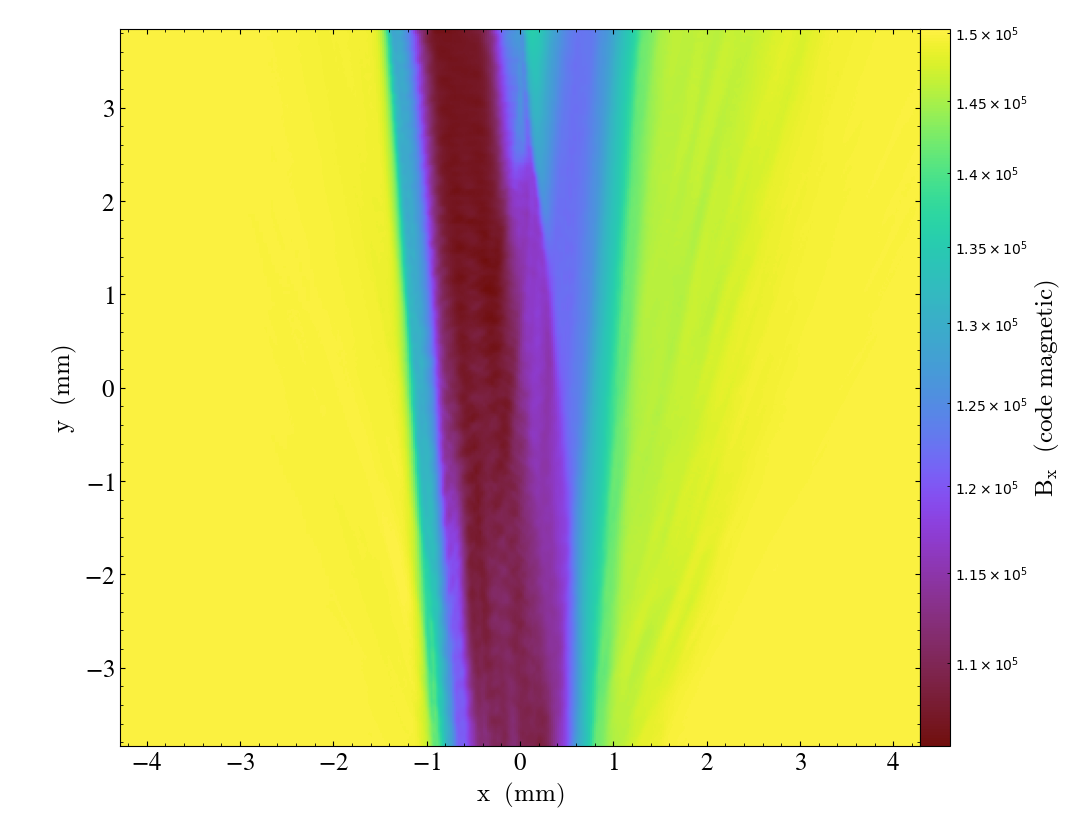

In [9]:
slc = yt.SlicePlot(ds, "z", "magx",center=[0,.6,0]).zoom(1.4)
slc.show()

Text(0, 0.5, 'Number Density [$cm^{-3}$]')

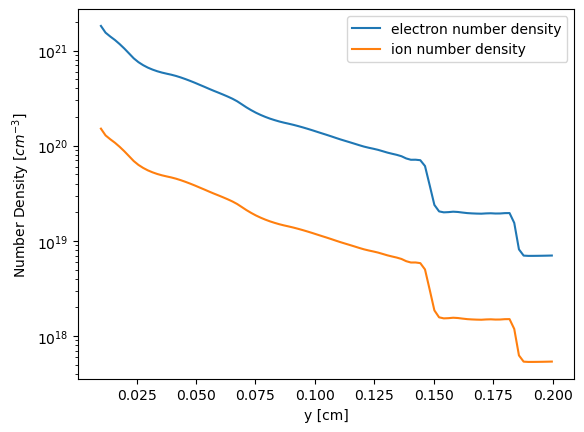

In [10]:
# Take a lineout of the number density to find where the target ends and where the piston begins
start_pt = (0.0,0.01,0.0)
end_pt = (0.0,0.2,0.0)
ray = ds.ray(start_pt, end_pt)

length_of_ray = np.sqrt((end_pt[0]-start_pt[0])**2 + (end_pt[1]-start_pt[1])**2 + (end_pt[2]-start_pt[2])**2)
dist_from_origin = np.sqrt(start_pt[0]**2 + start_pt[1]**2 + start_pt[2]**2)
ray_sort = np.argsort(ray["t"])
dist = np.array(ray[('t')]*length_of_ray+dist_from_origin)

y = np.array(ray[('flash','y')][ray_sort])
idens = np.array(ray[('flash','idens')][ray_sort])

edens = np.array(ray[('flash','edens')][ray_sort])
plt.semilogy(dist, edens, label='electron number density')
plt.semilogy(dist, idens, label='ion number density')
plt.legend()

# from transform import pretty_plot
# pretty_plot()


plt.xlabel('y [cm]')
plt.ylabel(r'Number Density [$cm^{-3}$]')
# based on this plot, it looks like the piston begins at y = 0.01

# print(edens[-200])

NameError: name 'pretty_plot' is not defined

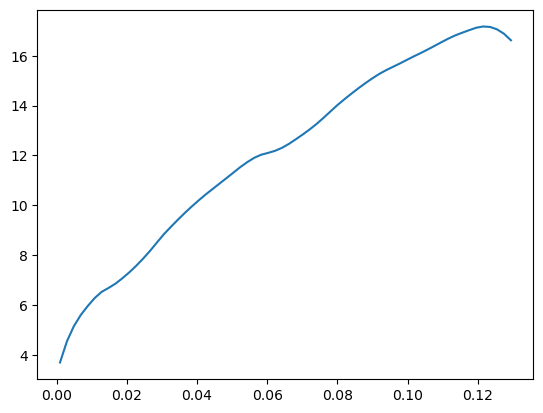

In [11]:
piston_ray = ds.ray((0, 0.01, 0), (0, .14, 0))
vely = np.array(piston_ray[('flash','vely')])
piston = np.array(piston_ray[('flash','y')])-0.01

plt.plot(piston, vely/v_alfven)
pretty_plot()
plt.legend()


mach_number_max = np.max(vely)/v_alfven
mach_number_min = np.min(vely)/v_alfven


print(f"\nmach number is between {mach_number_min.value} and {mach_number_max.value}")

plt.xlabel('y [cm]')
plt.ylabel(r'$v_y/v_A$')

plt.title('Velocity distribution of piston')
# plt.hlines(v_alfven, 0, 0.15, label='Alfven speed')

yt : [INFO     ] 2024-10-18 09:45:52,103 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:52,103 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:52,104 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:52,105 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:52,105 Making a fixed resolution buffer of (('flash', 'tion')) 800 by 800


tion at [0.   0.05 0.  ] code_length: [12869889.1638502] code_temperature



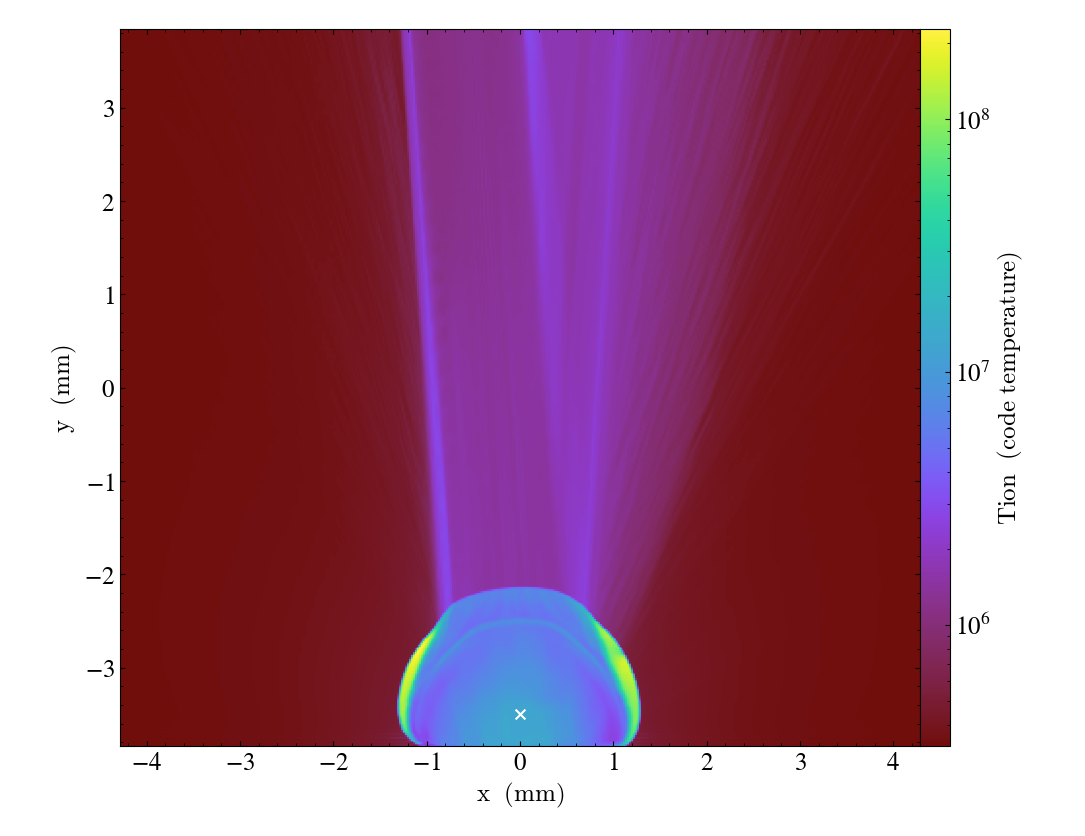

yt : [INFO     ] 2024-10-18 09:45:54,488 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:54,488 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:54,489 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-10-18 09:45:54,489 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-10-18 09:45:54,490 Making a fixed resolution buffer of (('flash', 'tele')) 800 by 800


tele at [0.   0.05 0.  ] code_length: [20324247.83795029] code_temperature



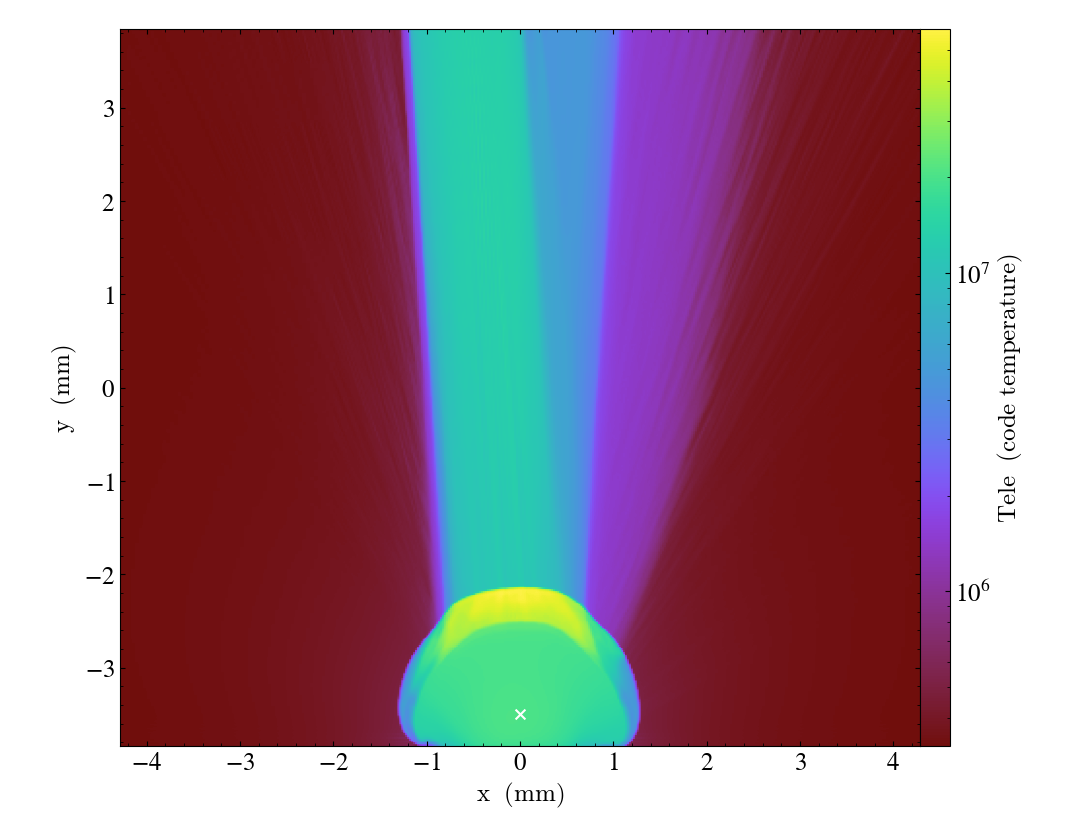

[-0.36677169] dimensionless


In [10]:
Ti_0 = pull_value_at_coord(background_pt,'tion',ds)

Te_0 = pull_value_at_coord(background_pt,'tele',ds)

print((Ti_0 - Te_0)/Te_0) # looks like the temperature difference is around 88%

## Now, start making (throwing) fits!

Some care needs to be taken with the fitting of the piston region and the compression after it. It looks like in the region around 750-900 [c/omega_pe], there is a compression of the background ions. Let's try to see if we can resolve this exactly

In [15]:
aluminum = pull_value_at_coord([0,0.20,0], "sumy",ds,plot = False)
print(1/aluminum)
magnesium = pull_value_at_coord([0,0.1,0], "sumy",ds, plot = False)
print(1/magnesium)
def make_magnesium_number_density(field, data):
    
    mg_percentage = (data["flash","sumy"]-aluminum)/(magnesium-aluminum)
    mg_number_density = mg_percentage*data["flash","idens"]
    return mg_number_density

def make_aluminum_number_density(field, data):
    mg_percentage = (data["flash","sumy"]-aluminum)/(magnesium-aluminum)
    al_number_density = (1-mg_percentage)*data["flash","idens"]
    return al_number_density

ds.add_field(("flash", "mgdens"), function=make_magnesium_number_density, units="code_mass/code_length**3",sampling_type="cell") # technically the units are wrong here, should be massless
ds.add_field(("flash", "aldens"), function=make_aluminum_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here

yt : [INFO     ] 2024-09-11 11:23:26,402 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-11 11:23:26,402 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-09-11 11:23:26,403 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-11 11:23:26,403 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-09-11 11:23:26,404 Making a fixed resolution buffer of (('flash', 'sumy')) 800 by 800


yt : [INFO     ] 2024-09-11 11:23:26,491 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-11 11:23:26,492 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-09-11 11:23:26,493 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-09-11 11:23:26,493 ylim = -0.137500 0.937500
yt : [INFO     ] 2024-09-11 11:23:26,493 Making a fixed resolution buffer of (('flash', 'sumy')) 800 by 800
yt : [WARNING  ] 2024-09-11 11:23:26,572 Field ('flash', 'mgdens') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2024-09-11 11:23:26,573 Field ('flash', 'aldens') already exists. To override use `force_override=True`.


sumy at [0.  0.2 0. ] code_length: [0.03706449] dimensionless
[26.98] dimensionless
sumy at [0.  0.1 0. ] code_length: [0.04114372] dimensionless
[24.30504406] dimensionless


In [ ]:
piston_start = [0,0.01,0];piston_end = [0,0.149,0]

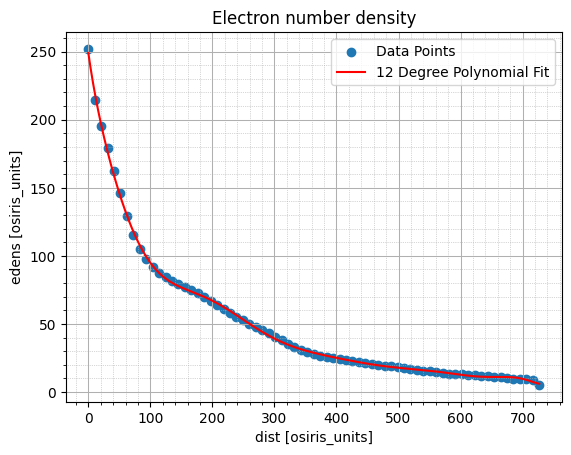

"if(x1 < 726.84049,  (6370972.420242)*((x1 - 0.0)/726.84049)^(12) + (-39742100.136893)*((x1 - 0.0)/726.84049)^(11) + (108729501.547577)*((x1 - 0.0)/726.84049)^(10) + (-171251229.395475)*((x1 - 0.0)/726.84049)^(9) + (171269557.234635)*((x1 - 0.0)/726.84049)^(8) + (-113087847.486855)*((x1 - 0.0)/726.84049)^(7) + (49644422.293427)*((x1 - 0.0)/726.84049)^(6) + (-14243639.775576)*((x1 - 0.0)/726.84049)^(5) + (2575942.873519)*((x1 - 0.0)/726.84049)^(4) + (-286909.780671)*((x1 - 0.0)/726.84049)^(3) + (23423.819117)*((x1 - 0.0)/726.84049)^(2) + (-2336.483204)*((x1 - 0.0)/726.84049)^(1) + (248.962260)*((x1 - 0.0)/726.84049)^(0), 0.0)",

----------Desmos formatting to check your work----------

(6370972.420242)*((x - 0.0)/726.84049)^12 + (-39742100.136893)*((x - 0.0)/726.84049)^11 + (108729501.547577)*((x - 0.0)/726.84049)^10 + (-171251229.395475)*((x - 0.0)/726.84049)^9 + (171269557.234635)*((x - 0.0)/726.84049)^8 + (-113087847.486855)*((x - 0.0)/726.84049)^7 + (49644422.293427)*((x - 0.0)/726.

In [ ]:
pretty_plot()
plt.title('Electron number density')
fit_to_region(start_pt=piston_start,end_pt=piston_end,field='edens',degree=12,ds=ds, normalization=ne_0, osiris=osiris,precision=6,left_value=None, right_value=0.0)

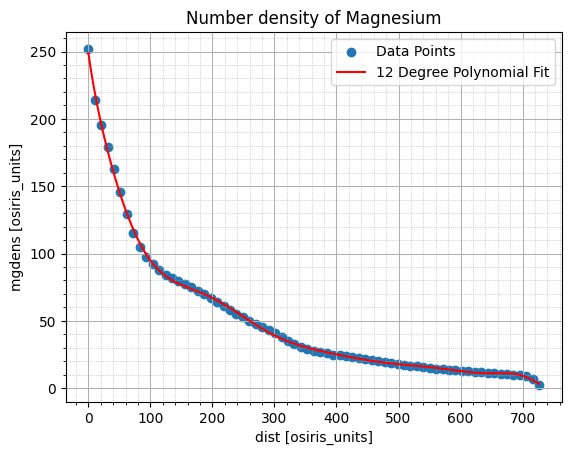

"if(x1 < 726.84049,  (6443194.521899)*((x1 - 0.0)/726.84049)^(12) + (-40206340.334071)*((x1 - 0.0)/726.84049)^(11) + (110015047.75606)*((x1 - 0.0)/726.84049)^(10) + (-173271689.581762)*((x1 - 0.0)/726.84049)^(9) + (173264383.907158)*((x1 - 0.0)/726.84049)^(8) + (-114379341.642074)*((x1 - 0.0)/726.84049)^(7) + (50199370.201206)*((x1 - 0.0)/726.84049)^(6) + (-14400189.712961)*((x1 - 0.0)/726.84049)^(5) + (2603953.918671)*((x1 - 0.0)/726.84049)^(4) + (-289884.606485)*((x1 - 0.0)/726.84049)^(3) + (23590.110458)*((x1 - 0.0)/726.84049)^(2) + (-2340.395887)*((x1 - 0.0)/726.84049)^(1) + (248.993423)*((x1 - 0.0)/726.84049)^(0), 0.0)",

----------Desmos formatting to check your work----------

(6443194.521899)*((x - 0.0)/726.84049)^12 + (-40206340.334071)*((x - 0.0)/726.84049)^11 + (110015047.75606)*((x - 0.0)/726.84049)^10 + (-173271689.581762)*((x - 0.0)/726.84049)^9 + (173264383.907158)*((x - 0.0)/726.84049)^8 + (-114379341.642074)*((x - 0.0)/726.84049)^7 + (50199370.201206)*((x - 0.0)/726.84

In [ ]:
pretty_plot()
plt.title('Number density of Magnesium')
fit_to_region(start_pt=piston_start,end_pt=piston_end,field='mgdens',degree=12,ds=ds, normalization=ne_0/12, osiris=osiris,precision=6,left_value=None, right_value=0.0)

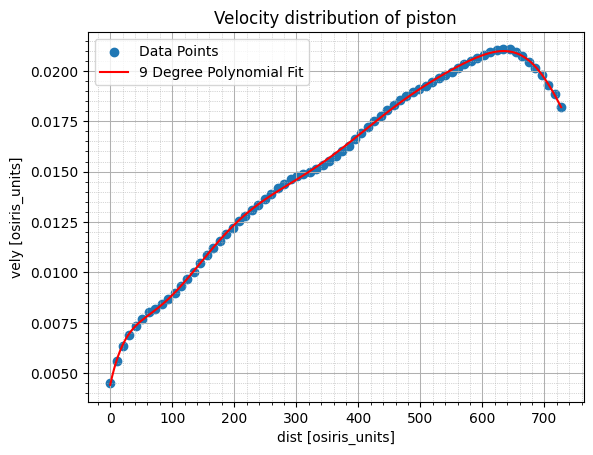

"(17.448884)*((x1 - 0.0)/726.84049)^(9) +(-84.489885)*((x1 - 0.0)/726.84049)^(8) +(172.203460)*((x1 - 0.0)/726.84049)^(7) +(-191.802441)*((x1 - 0.0)/726.84049)^(6) +(126.621815)*((x1 - 0.0)/726.84049)^(5) +(-50.193628)*((x1 - 0.0)/726.84049)^(4) +(11.543659)*((x1 - 0.0)/726.84049)^(3) +(-1.421126)*((x1 - 0.0)/726.84049)^(2) +(0.103030)*((x1 - 0.0)/726.84049)^(1) +(0.004429)*((x1 - 0.0)/726.84049)^(0)",

----------Desmos formatting to check your work----------

(17.448884)*((x - 0.0)/726.84049)^9 + (-84.489885)*((x - 0.0)/726.84049)^8 + (172.203460)*((x - 0.0)/726.84049)^7 + (-191.802441)*((x - 0.0)/726.84049)^6 + (126.621815)*((x - 0.0)/726.84049)^5 + (-50.193628)*((x - 0.0)/726.84049)^4 + (11.543659)*((x - 0.0)/726.84049)^3 + (-1.421126)*((x - 0.0)/726.84049)^2 + (0.103030)*((x - 0.0)/726.84049)^1 + (0.004429)*((x - 0.0)/726.84049)^0


In [ ]:
pretty_plot()
plt.title('Velocity distribution of piston')
fit_to_region(start_pt=piston_start,end_pt=piston_end,field='vely',degree=9,ds=ds, normalization=v_alfven/ osiris['alfven_speed'], osiris=osiris,precision=6,left_value=None, right_value=None)

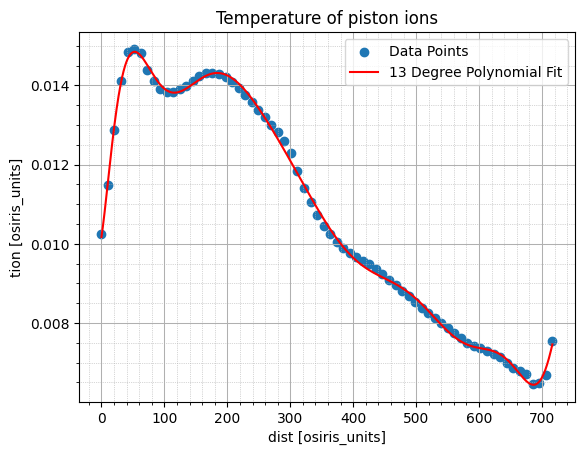

"(-3769.206567)*((x1 - 0.0)/716.454985)^(13) +(25272.925185)*((x1 - 0.0)/716.454985)^(12) +(-75212.318865)*((x1 - 0.0)/716.454985)^(11) +(130917.006683)*((x1 - 0.0)/716.454985)^(10) +(-147822.419544)*((x1 - 0.0)/716.454985)^(9) +(113451.741551)*((x1 - 0.0)/716.454985)^(8) +(-60239.249495)*((x1 - 0.0)/716.454985)^(7) +(22050.560185)*((x1 - 0.0)/716.454985)^(6) +(-5422.764044)*((x1 - 0.0)/716.454985)^(5) +(844.33864)*((x1 - 0.0)/716.454985)^(4) +(-72.921543)*((x1 - 0.0)/716.454985)^(3) +(2.227217)*((x1 - 0.0)/716.454985)^(2) +(0.077887)*((x1 - 0.0)/716.454985)^(1) +(0.01017)*((x1 - 0.0)/716.454985)^(0)",

----------Desmos formatting to check your work----------

(-3769.206567)*((x - 0.0)/716.454985)^13 + (25272.925185)*((x - 0.0)/716.454985)^12 + (-75212.318865)*((x - 0.0)/716.454985)^11 + (130917.006683)*((x - 0.0)/716.454985)^10 + (-147822.419544)*((x - 0.0)/716.454985)^9 + (113451.741551)*((x - 0.0)/716.454985)^8 + (-60239.249495)*((x - 0.0)/716.454985)^7 + (22050.560185)*((x - 0.0)/7

In [ ]:
pretty_plot()
plt.title('Temperature of piston ions')
fit_to_region(start_pt=piston_start,end_pt=[0,0.148,0],field='tion',degree=13,ds=ds, normalization=Ti_0.value/osiris['Tpiston'], osiris=osiris,precision=6,left_value=None, right_value=None)

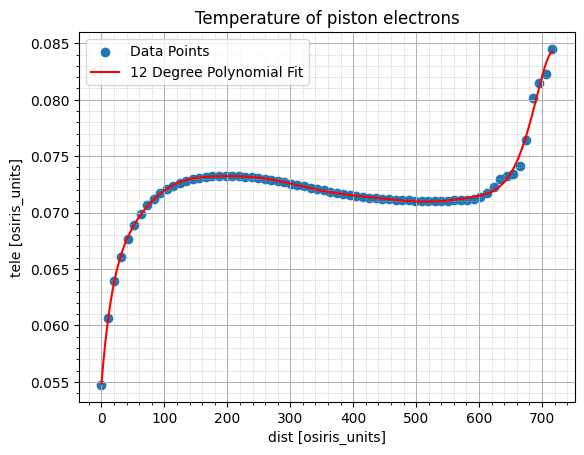

"(-1559.349446)*((x1 - 0.0)/716.454985)^(12) +(9263.943155)*((x1 - 0.0)/716.454985)^(11) +(-24246.00861)*((x1 - 0.0)/716.454985)^(10) +(36796.996168)*((x1 - 0.0)/716.454985)^(9) +(-35870.813060)*((x1 - 0.0)/716.454985)^(8) +(23513.523802)*((x1 - 0.0)/716.454985)^(7) +(-10552.252421)*((x1 - 0.0)/716.454985)^(6) +(3242.737741)*((x1 - 0.0)/716.454985)^(5) +(-673.410725)*((x1 - 0.0)/716.454985)^(4) +(92.426224)*((x1 - 0.0)/716.454985)^(3) +(-8.255462)*((x1 - 0.0)/716.454985)^(2) +(0.492050)*((x1 - 0.0)/716.454985)^(1) +(0.054839)*((x1 - 0.0)/716.454985)^(0)",

----------Desmos formatting to check your work----------

(-1559.349446)*((x - 0.0)/716.454985)^12 + (9263.943155)*((x - 0.0)/716.454985)^11 + (-24246.00861)*((x - 0.0)/716.454985)^10 + (36796.996168)*((x - 0.0)/716.454985)^9 + (-35870.813060)*((x - 0.0)/716.454985)^8 + (23513.523802)*((x - 0.0)/716.454985)^7 + (-10552.252421)*((x - 0.0)/716.454985)^6 + (3242.737741)*((x - 0.0)/716.454985)^5 + (-673.410725)*((x - 0.0)/716.454985)^4 +

In [ ]:
pretty_plot()
plt.title('Temperature of piston electrons')
fit_to_region(start_pt=piston_start,end_pt=[0,0.148,0],field='tele',degree=12,ds=ds, normalization=Te_0.value/osiris['Te'], osiris=osiris,precision=6,left_value=None, right_value=None)

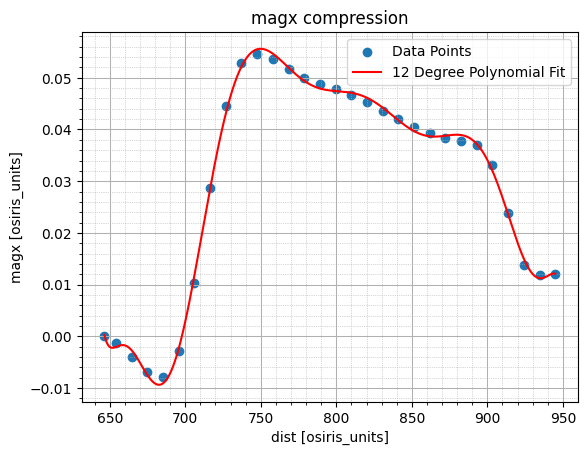

"if(x1 < 646.432523, 0, if(x1 < 944.936112,  (3529.714887)*((x1 - 646.432523)/298.503588)^(12) + (-26785.969127)*((x1 - 646.432523)/298.503588)^(11) + (86781.804418)*((x1 - 646.432523)/298.503588)^(10) + (-158521.37377)*((x1 - 646.432523)/298.503588)^(9) + (180749.225765)*((x1 - 646.432523)/298.503588)^(8) + (-134021.489965)*((x1 - 646.432523)/298.503588)^(7) + (65059.204101)*((x1 - 646.432523)/298.503588)^(6) + (-20223.400077)*((x1 - 646.432523)/298.503588)^(5) + (3802.742049)*((x1 - 646.432523)/298.503588)^(4) + (-388.670963)*((x1 - 646.432523)/298.503588)^(3) + (18.594250)*((x1 - 646.432523)/298.503588)^(2) + (-0.369772)*((x1 - 646.432523)/298.503588)^(1) + (0.000316)*((x1 - 646.432523)/298.503588)^(0), 0.012))",

----------Desmos formatting to check your work----------

(3529.714887)*((x - 646.432523)/298.503588)^12 + (-26785.969127)*((x - 646.432523)/298.503588)^11 + (86781.804418)*((x - 646.432523)/298.503588)^10 + (-158521.37377)*((x - 646.432523)/298.503588)^9 + (180749.225765)

In [ ]:
pretty_plot()
plt.title('magx compression')
fit_to_region(start_pt=[0.0,0.133,0.0],end_pt=[0.0,0.19,0.0],field='magx',degree=12,ds=ds, normalization=Bx_0.value/ osiris['B'], osiris=osiris,precision=6,left_value=0, right_value=osiris['B'])

### We need to create the electric field and put those into OSIRIS in order to maintain ideal MHD

In [ ]:
def make_Ex(field, data):
    Ex = data['flash','velz']*data["flash","magy"]-data["flash","vely"]*data["flash","magz"]
    return Ex

def make_Ey(field, data):
    Ey = data['flash','velx']*data["flash","magz"]-data["flash","velz"]*data["flash","magx"]
    return Ey

def make_Ez(field, data):
    Ez = data['flash','vely']*data["flash","magx"]-data["flash","velx"]*data["flash","magy"]
    return Ez

ds.add_field(("flash", "Ex"), function=make_Ex, units="code_magnetic*code_length/code_time",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "Ey"), function=make_Ey, units="code_magnetic*code_length/code_time",sampling_type="cell")
ds.add_field(("flash", "Ez"), function=make_Ez, units="code_magnetic*code_length/code_time",sampling_type="cell")

yt : [INFO     ] 2024-08-23 15:59:51,999 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-23 15:59:52,000 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-23 15:59:52,002 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-08-23 15:59:52,002 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-08-23 15:59:52,003 Making a fixed resolution buffer of (('flash', 'Ez')) 800 by 800



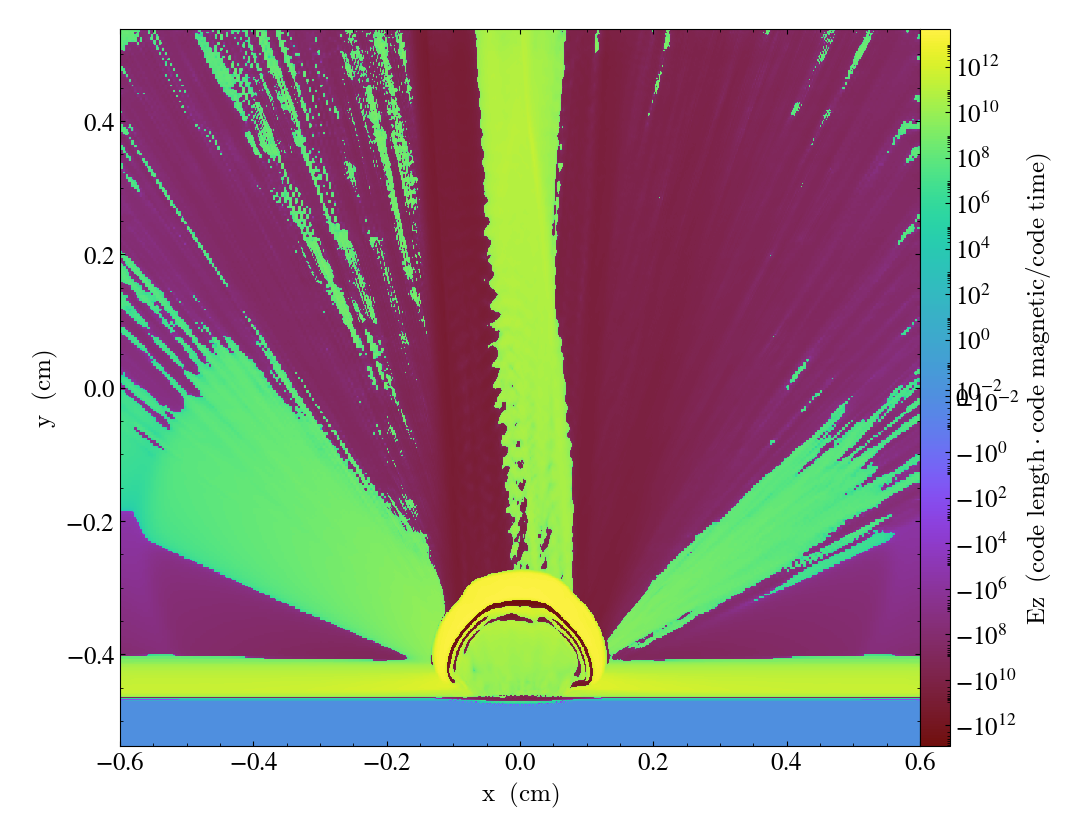

In [ ]:
yt.SlicePlot(ds, 'z', ('flash', 'Ez')).show()

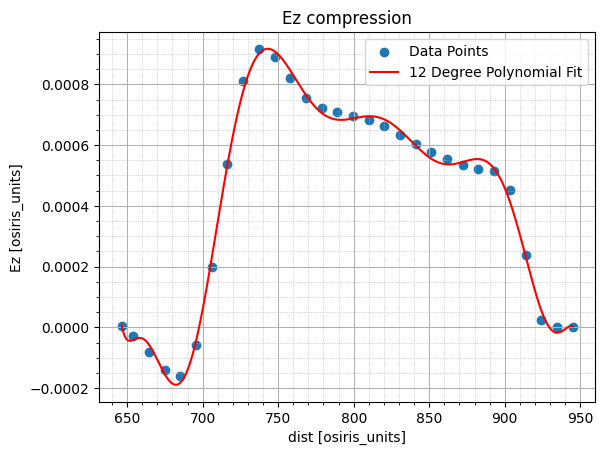

"if(x1 < 646.432523, 0, if(x1 < 944.936112,  (84.516845)*((x1 - 646.432523)/298.503588)^(12) + (-628.629510)*((x1 - 646.432523)/298.503588)^(11) + (2002.791657)*((x1 - 646.432523)/298.503588)^(10) + (-3603.519246)*((x1 - 646.432523)/298.503588)^(9) + (4049.286421)*((x1 - 646.432523)/298.503588)^(8) + (-2958.110245)*((x1 - 646.432523)/298.503588)^(7) + (1413.481378)*((x1 - 646.432523)/298.503588)^(6) + (-431.937437)*((x1 - 646.432523)/298.503588)^(5) + (79.759029)*((x1 - 646.432523)/298.503588)^(4) + (-8.008078)*((x1 - 646.432523)/298.503588)^(3) + (0.376584)*((x1 - 646.432523)/298.503588)^(2) + (-0.007402)*((x1 - 646.432523)/298.503588)^(1) + (0.000006)*((x1 - 646.432523)/298.503588)^(0), 0.0))",

----------Desmos formatting to check your work----------

(84.516845)*((x - 646.432523)/298.503588)^12 + (-628.629510)*((x - 646.432523)/298.503588)^11 + (2002.791657)*((x - 646.432523)/298.503588)^10 + (-3603.519246)*((x - 646.432523)/298.503588)^9 + (4049.286421)*((x - 646.432523)/298.50358

In [ ]:
pretty_plot()
plt.title('Ez compression')
fit_to_region(start_pt=[0.0,0.133,0.0],end_pt=[0.0,0.19,0.0],field='Ez',degree=12,ds=ds, normalization=Bx_0.value/ osiris['B']*v_alfven/osiris['alfven_speed'], osiris=osiris,precision=6,left_value=0, right_value=0.0)

### Get the density compression of the aluminum plasma

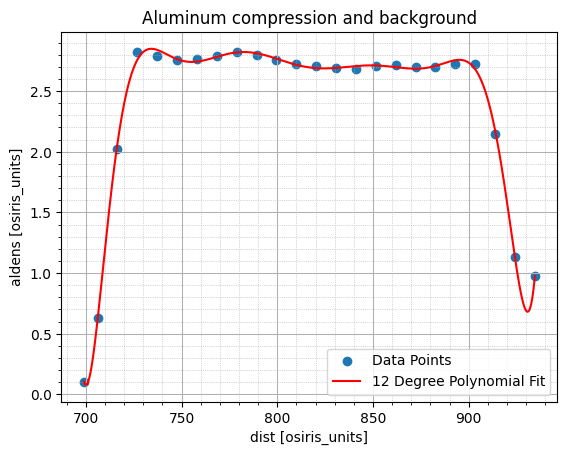

"if(x1 < 698.988, 0.0, if(x1 < 934.5506,  (153756.6928)*((x1 - 698.988)/235.5626)^(12) + (-940360.0352)*((x1 - 698.988)/235.5626)^(11) + (2599955.0582)*((x1 - 698.988)/235.5626)^(10) + (-4285529.6428)*((x1 - 698.988)/235.5626)^(9) + (4661673.4889)*((x1 - 698.988)/235.5626)^(8) + (-3489458.7109)*((x1 - 698.988)/235.5626)^(7) + (1815320.9510)*((x1 - 698.988)/235.5626)^(6) + (-647104.6089)*((x1 - 698.988)/235.5626)^(5) + (151794.3295)*((x1 - 698.988)/235.5626)^(4) + (-21539.3082)*((x1 - 698.988)/235.5626)^(3) + (1505.3188)*((x1 - 698.988)/235.5626)^(2) + (-12.6658)*((x1 - 698.988)/235.5626)^(1) + (0.1078)*((x1 - 698.988)/235.5626)^(0), 1.0))",

----------Desmos formatting to check your work----------

(153756.6928)*((x - 698.988)/235.5626)^12 + (-940360.0352)*((x - 698.988)/235.5626)^11 + (2599955.0582)*((x - 698.988)/235.5626)^10 + (-4285529.6428)*((x - 698.988)/235.5626)^9 + (4661673.4889)*((x - 698.988)/235.5626)^8 + (-3489458.7109)*((x - 698.988)/235.5626)^7 + (1815320.9510)*((x - 698

In [ ]:
pretty_plot()
plt.title('Aluminum compression and background')
fit_to_region(start_pt=[0.0,0.143,0.0],end_pt=[0.0,0.188,0.0],field='aldens',degree=12,ds=ds, normalization=ne_0/13, osiris=osiris,precision=4,left_value=0.0, right_value=1.0)

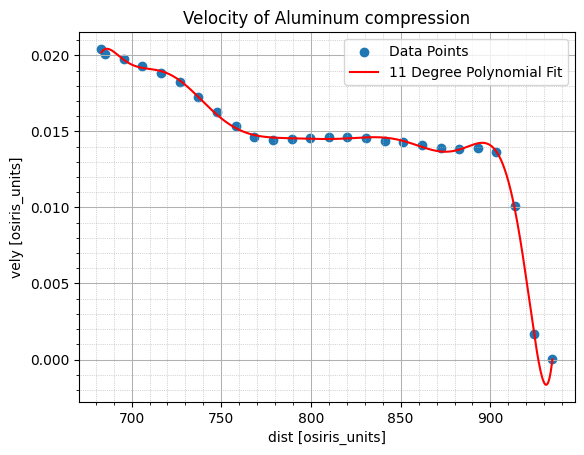

"if(x1 < 683.221366, 0.02, if(x1 < 934.550606,  (867.681766)*((x1 - 683.221366)/251.32924)^(11) + (-4520.608618)*((x1 - 683.221366)/251.32924)^(10) + (10179.697114)*((x1 - 683.221366)/251.32924)^(9) + (-12975.478631)*((x1 - 683.221366)/251.32924)^(8) + (10290.935821)*((x1 - 683.221366)/251.32924)^(7) + (-5251.591462)*((x1 - 683.221366)/251.32924)^(6) + (1720.142333)*((x1 - 683.221366)/251.32924)^(5) + (-349.229600)*((x1 - 683.221366)/251.32924)^(4) + (40.79451)*((x1 - 683.221366)/251.32924)^(3) + (-2.406016)*((x1 - 683.221366)/251.32924)^(2) + (0.04259)*((x1 - 683.221366)/251.32924)^(1) + (0.020203)*((x1 - 683.221366)/251.32924)^(0), 0.0))",

----------Desmos formatting to check your work----------

(867.681766)*((x - 683.221366)/251.32924)^11 + (-4520.608618)*((x - 683.221366)/251.32924)^10 + (10179.697114)*((x - 683.221366)/251.32924)^9 + (-12975.478631)*((x - 683.221366)/251.32924)^8 + (10290.935821)*((x - 683.221366)/251.32924)^7 + (-5251.591462)*((x - 683.221366)/251.32924)^6 + (1

In [ ]:
pretty_plot()
plt.title('Velocity of Aluminum compression')
fit_to_region(start_pt=[0.0,0.14,0.0],end_pt=[0.0,0.188,0.0],field='vely',degree=11,ds=ds, normalization=v_alfven/osiris['alfven_speed'], osiris=osiris,precision=6,left_value=0.02, right_value=0.0)

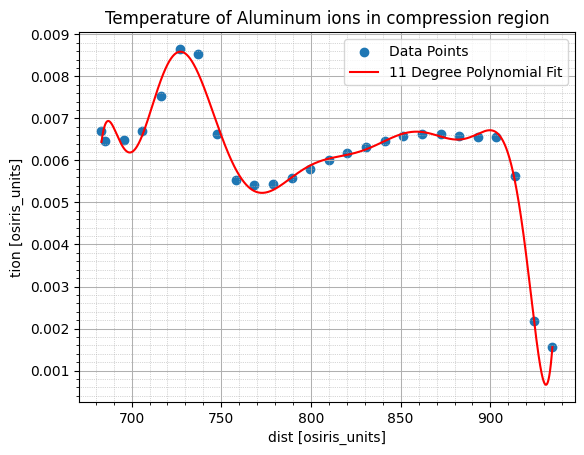

"if(x1 < 934.550606,  (924.28228)*((x1 - 683.221366)/251.32924)^(11) + (-5080.959095)*((x1 - 683.221366)/251.32924)^(10) + (12108.706230)*((x1 - 683.221366)/251.32924)^(9) + (-16375.86965)*((x1 - 683.221366)/251.32924)^(8) + (13805.38767)*((x1 - 683.221366)/251.32924)^(7) + (-7493.975845)*((x1 - 683.221366)/251.32924)^(6) + (2607.83234)*((x1 - 683.221366)/251.32924)^(5) + (-559.308801)*((x1 - 683.221366)/251.32924)^(4) + (67.721410)*((x1 - 683.221366)/251.32924)^(3) + (-3.89974)*((x1 - 683.221366)/251.32924)^(2) + (0.078320)*((x1 - 683.221366)/251.32924)^(1) + (0.006439)*((x1 - 683.221366)/251.32924)^(0), 0.0016)",

----------Desmos formatting to check your work----------

(924.28228)*((x - 683.221366)/251.32924)^11 + (-5080.959095)*((x - 683.221366)/251.32924)^10 + (12108.706230)*((x - 683.221366)/251.32924)^9 + (-16375.86965)*((x - 683.221366)/251.32924)^8 + (13805.38767)*((x - 683.221366)/251.32924)^7 + (-7493.975845)*((x - 683.221366)/251.32924)^6 + (2607.83234)*((x - 683.221366)/2

In [ ]:
pretty_plot()
plt.title('Temperature of Aluminum ions in compression region')
fit_to_region(start_pt=[0.0,0.14,0.0],end_pt=[0.0,0.188,0.0],field='tion', degree=11,ds=ds, normalization= Ti_0/osiris['Tpiston'], osiris=osiris, precision=6,left_value=None, right_value=round(osiris['Tpiston'],4))

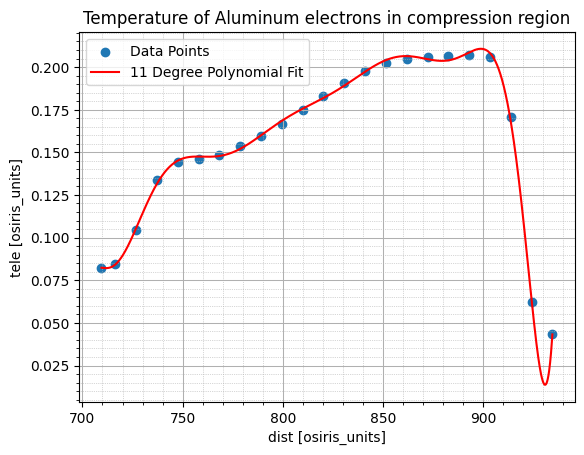

"if(x1 < 934.55060604,  (10384.9844337)*((x1 - 709.49911105)/225.05149499)^(11) + (-53000.8821021)*((x1 - 709.49911105)/225.05149499)^(10) + (116181.517507)*((x1 - 709.49911105)/225.05149499)^(9) + (-142880.13694829)*((x1 - 709.49911105)/225.05149499)^(8) + (107899.31593896)*((x1 - 709.49911105)/225.05149499)^(7) + (-51341.37226508)*((x1 - 709.49911105)/225.05149499)^(6) + (15105.80210014)*((x1 - 709.49911105)/225.05149499)^(5) + (-2543.73135108)*((x1 - 709.49911105)/225.05149499)^(4) + (195.51264147)*((x1 - 709.49911105)/225.05149499)^(3) + (-1.01957422)*((x1 - 709.49911105)/225.05149499)^(2) + (-0.02948288)*((x1 - 709.49911105)/225.05149499)^(1) + (0.08233878)*((x1 - 709.49911105)/225.05149499)^(0), 0.0468)",

----------Desmos formatting to check your work----------

(10384.9844337)*((x - 709.49911105)/225.05149499)^11 + (-53000.8821021)*((x - 709.49911105)/225.05149499)^10 + (116181.517507)*((x - 709.49911105)/225.05149499)^9 + (-142880.13694829)*((x - 709.49911105)/225.05149499)^8 

In [ ]:
pretty_plot()
plt.title('Temperature of Aluminum electrons in compression region')
fit_to_region(start_pt=[0.0,0.145,0.0],end_pt=[0.0,0.189,0.0],field='tele', degree=11,ds=ds, normalization= Te_0.value/osiris['Te'], osiris=osiris, precision=8,left_value=None, right_value=round(osiris['Te'],4))